# Complex Graphics with Seaborn

Throughout this course, we've seen how to use our basic Python skills to create sophisticated data graphics. Some nice developers have created the the Seaborn package, which can automate some of the work for us. Using Seaborn, we can create familiar plots more easily, and create new ones as well. 

Both base Matplotlib and Seaborn graphics are welcome on your projects. Please keep in mind that you must be ready to explain every facet of a plot. So, if you use a fancy Seaborn function to create a complicated visualization and then discuss only some of its facets, you may lose points for showing unnecessary information. 

In [70]:
import pandas as pd

In [71]:
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder



URLError: <urlopen error [Errno 11001] getaddrinfo failed>

Seaborn builds on the foundation of Matplotlib. It includes several simple commands to make very complex visualizations, including ones which would normally require a `for`-loop or use of `apply`.  The cost of all this power is that it is sometimes more difficult to exercise fine-grained control over the details. 

One of the main differences between Seaborn and Matplotlib is that Seaborn accepts the names of dataframe columns for many arguments. 

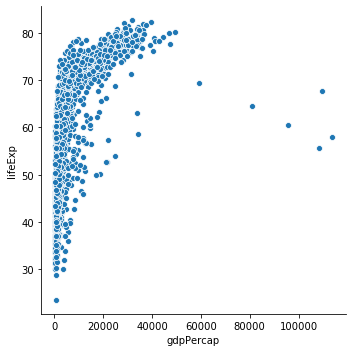

In [7]:
import seaborn as sns

#simple plot of gdppercapita vs liveext

sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp")

Looks good. We already got labels, and there is a nice outline around the points, but __what is a facetgrid__?

Now let's color the data by continent. (How would we have done this with Matplotlib?)

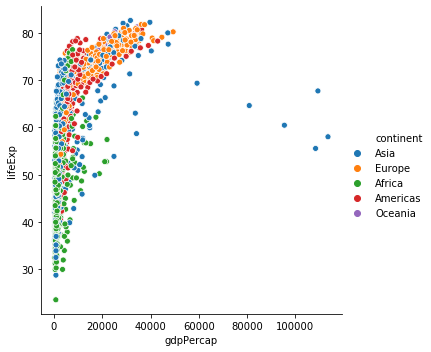

In [8]:
sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")

I am printing the axes attribute:
[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259E403DA58>]]


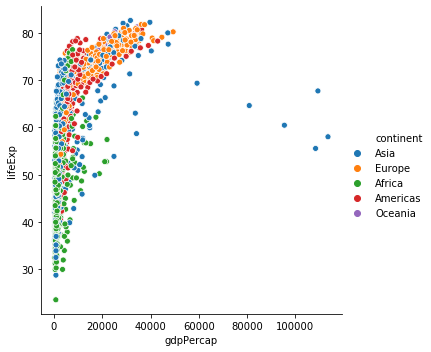

In [10]:
#now lets try to put the x-axis on a log scale
#cant just use ax.semilogx() right away
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")


#fgrid has an axes attribute
print("I am printing the axes attribute:")
print(fgrid.axes)


#fgrid.axes is an array of axes, so we can now use ax.semilogx() if we set ax to the write element of the array

[]

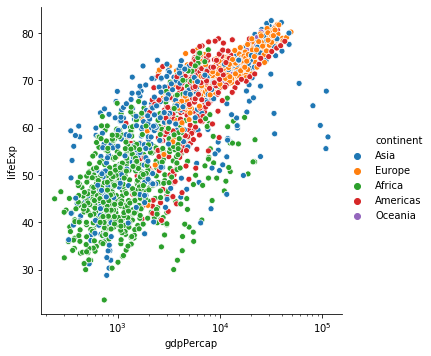

In [13]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent")

ax=fgrid.axes[0][0]

ax.semilogx()


Add transparancey

[]

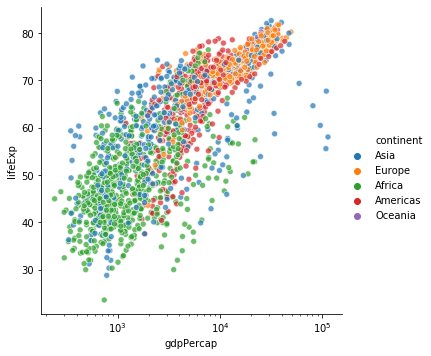

In [14]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7)

ax=fgrid.axes[0][0]

ax.semilogx()

## Now, let's group by continents

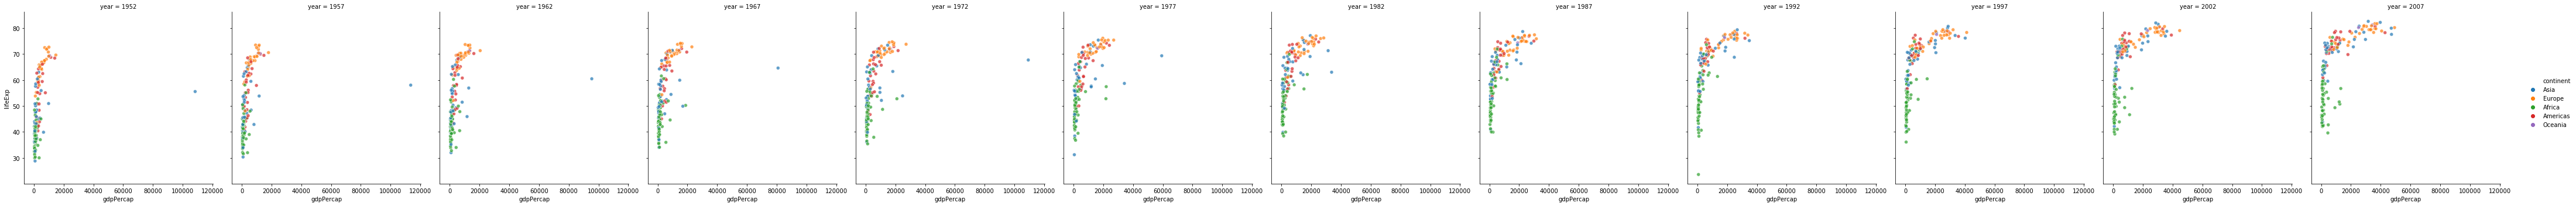

In [28]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7,col="year")


We lost our log?

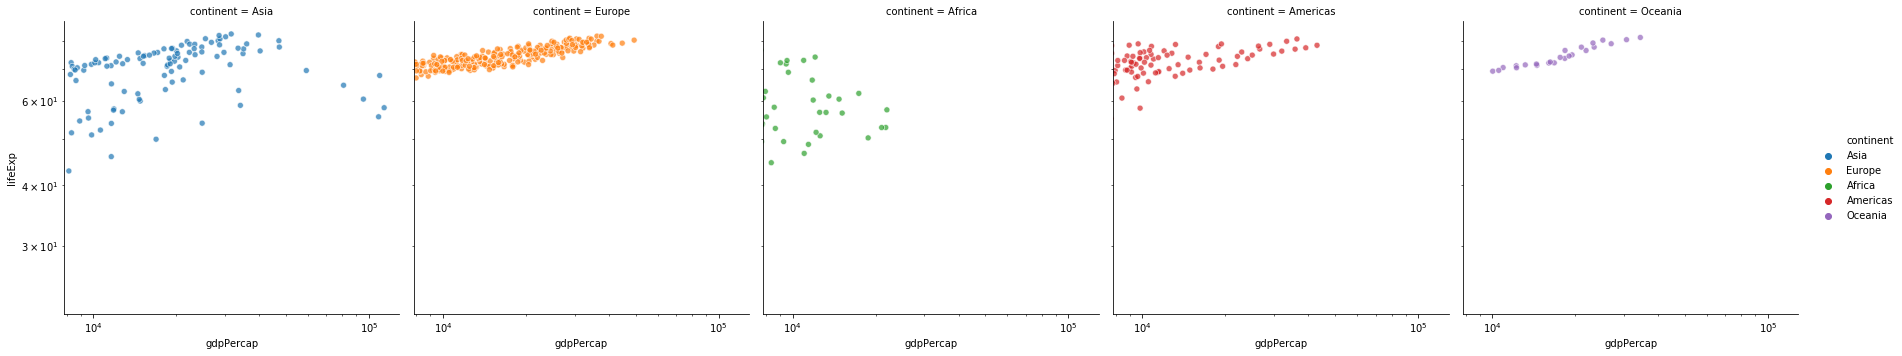

In [35]:
fgrid=sns.relplot(data=gapminder,x="gdpPercap",y="lifeExp",hue="continent",alpha=.7,col="continent")

for ax in fgrid.axes.flatten():
    ax.loglog()

Two rows of plots

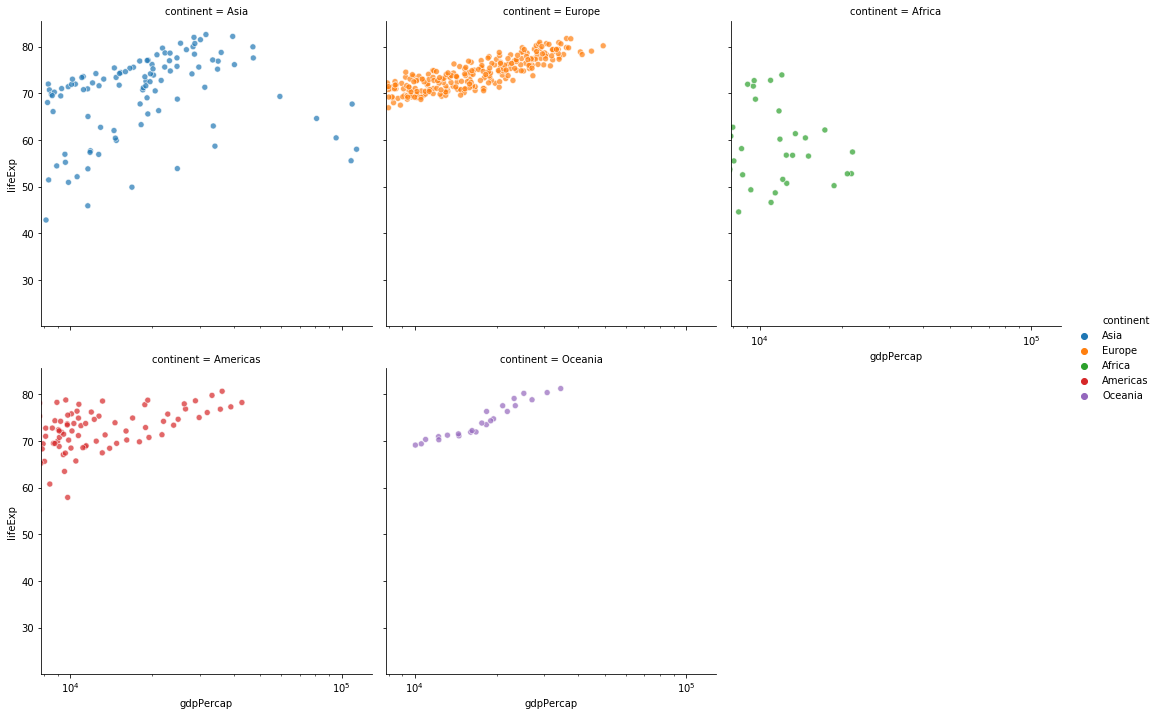

In [33]:
fgrid=sns.relplot(data=gapminder,
                  x="gdpPercap",
                  y="lifeExp",
                  hue="continent",
                  alpha=.7,
                  col="continent",
                  col_wrap=3
                  )

for ax in fgrid.axes.flatten():
    ax.semilogx()
    
#data is getting cut off, so what we would need to  do is to look up how to 
#specify the min and max x-axis in seaborn

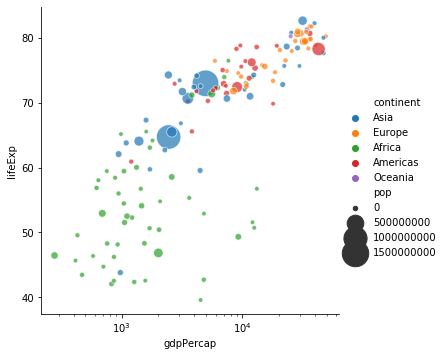

In [44]:
sub_gapminder = gapminder[gapminder["year"]==2007]

fgrid=sns.relplot(data=sub_gapminder,
                x="gdpPercap",
                y="lifeExp",
                alpha=.7,
                size="pop",
                hue="continent",
                sizes=(20,700)
                )

for ax in fgrid.axes.flatten():
    ax.semilogx()

## Bar Charts

Can put seaborn plots inside of normal matplot lib figures


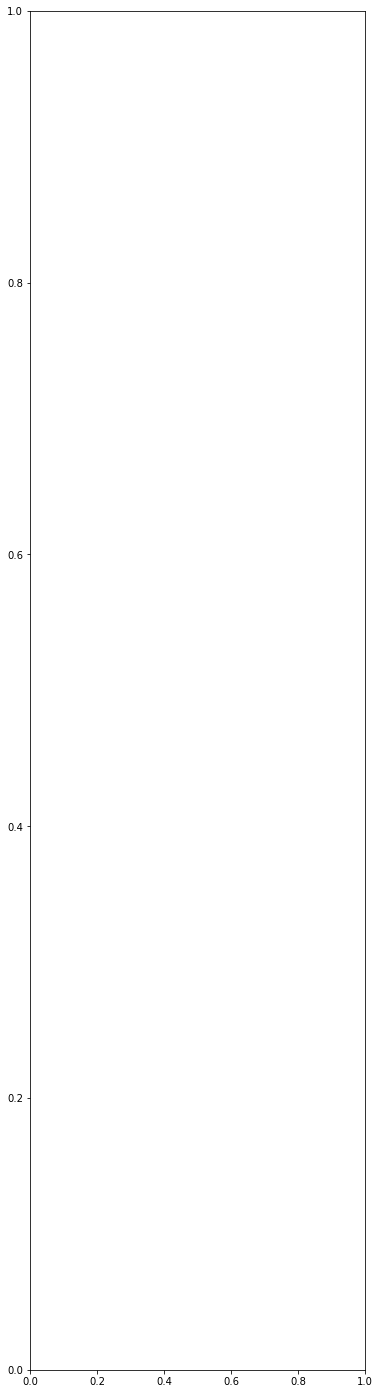

In [37]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(6,25))

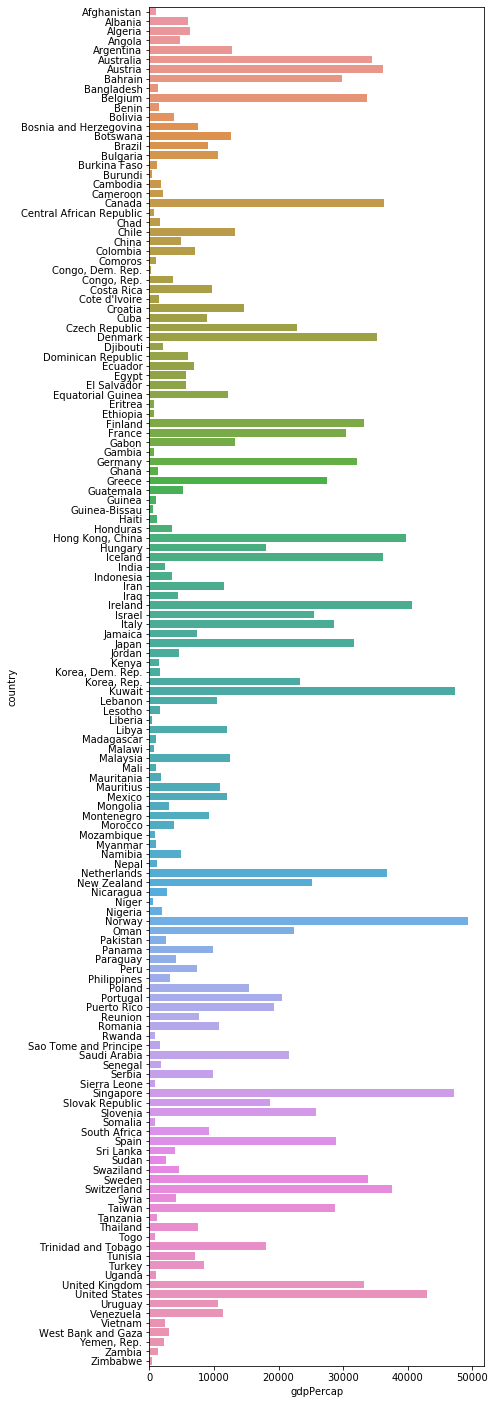

In [45]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder

sns.barplot(data=df,x="gdpPercap",y="country")


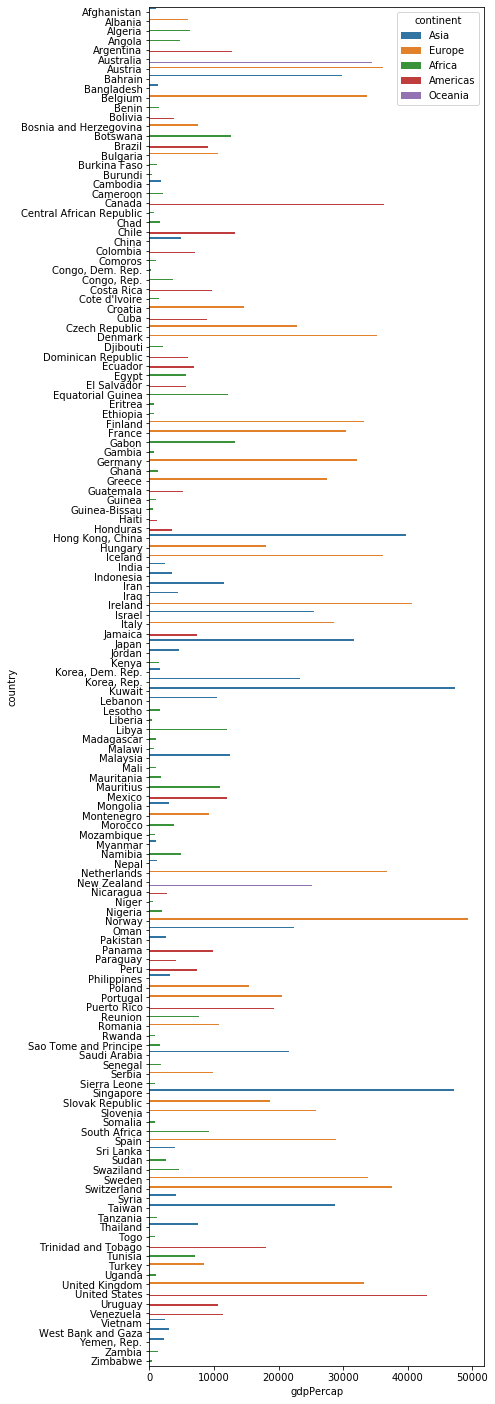

In [46]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder

sns.barplot(data=df,x="gdpPercap",y="country",hue="continent")

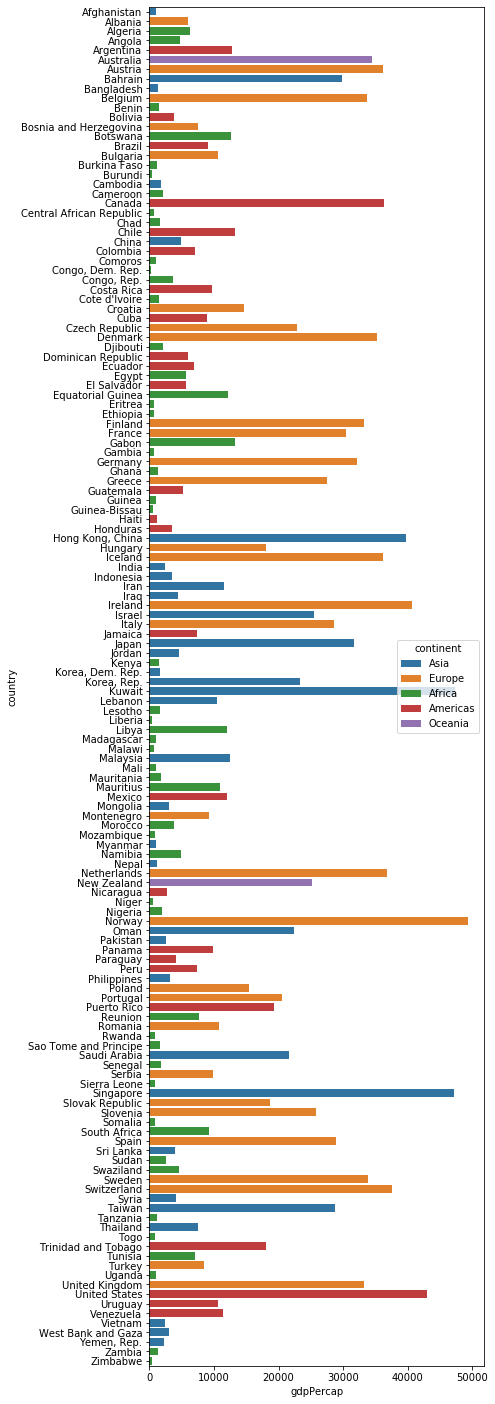

In [47]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder

sns.barplot(data=df,x="gdpPercap",y="country",hue="continent",dodge=False)

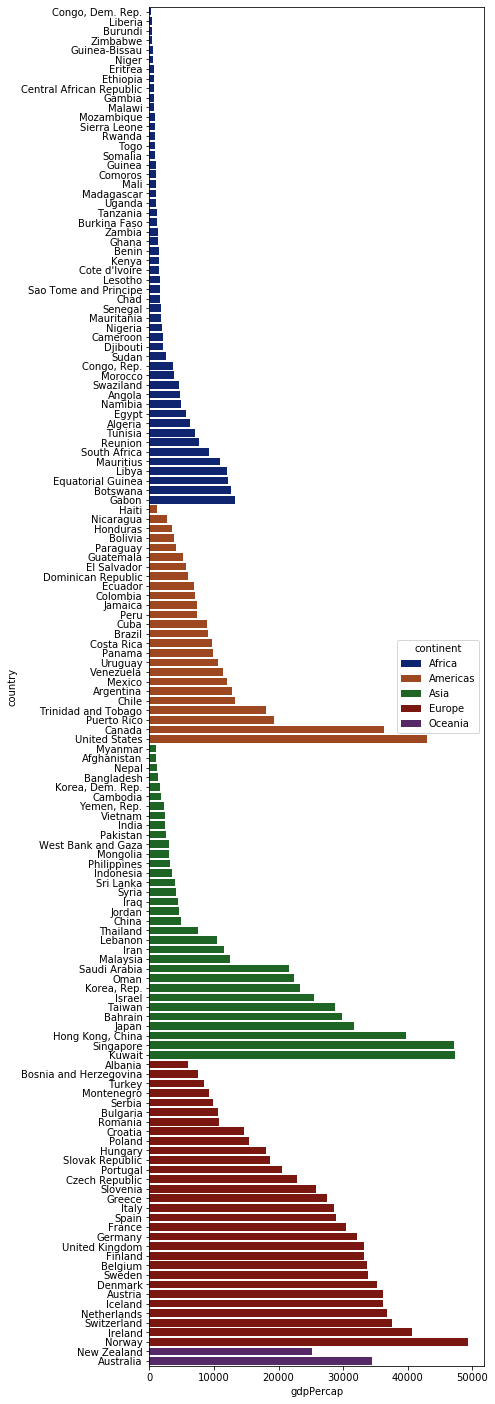

In [49]:
fig,ax=plt.subplots(figsize=(6,25))
df=sub_gapminder

#preprocess the data so that the line below works better
df=df.sort_values(["continent","gdpPercap"],ascending=True)

sns.barplot(data=df,x="gdpPercap",y="country",hue="continent",dodge=False,palette="dark") 

# Pairplots

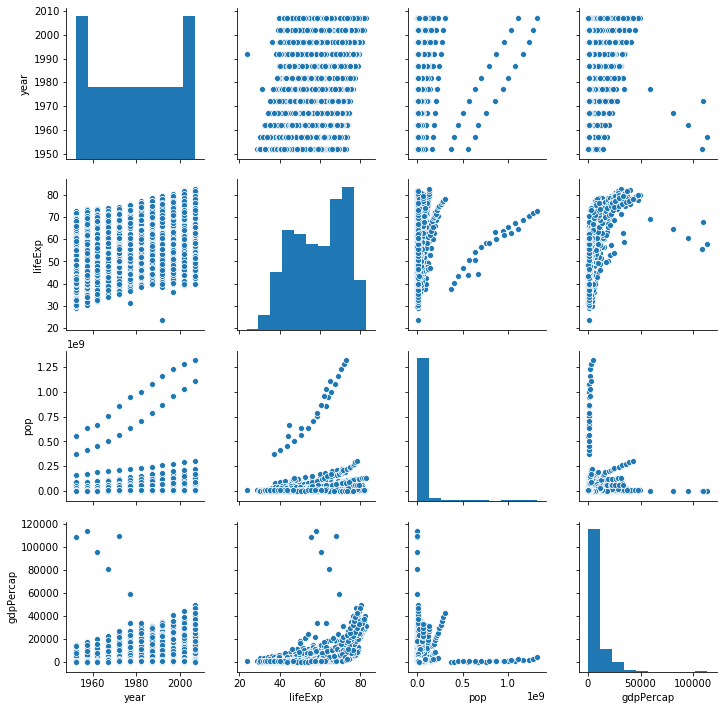

In [50]:
sns.pairplot(gapminder)

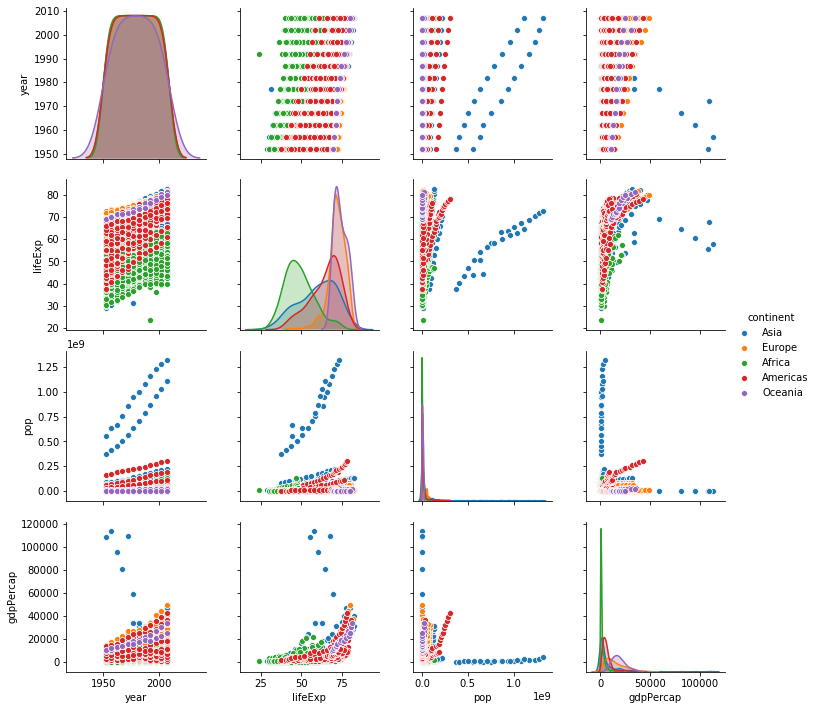

In [51]:
sns.pairplot(gapminder,hue="continent")

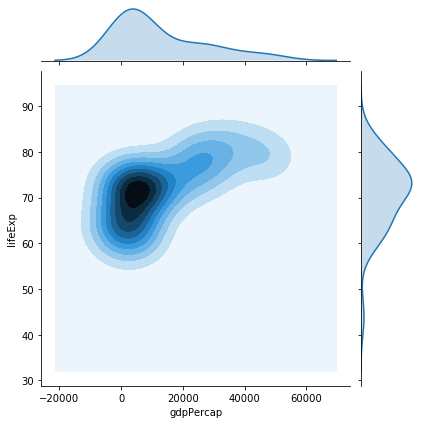

In [64]:
#joint plots
#only data from asia in 2007

ix=(gapminder["continent"]=="Asia") & (gapminder["year"]==2007)

subset=gapminder[ix]

sns.jointplot(data=subset,x="gdpPercap",y="lifeExp",kind="kde")

Many more examples available here https://seaborn.pydata.org/examples/index.html

In [59]:
?sns.jointplot